# Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

# Import Dataset

In [2]:
path = 'KPMG_VI_New_raw_data_update_final.xlsx'

In [3]:
customer_address_df = pd.read_excel(path, sheet_name= 'CustomerAddress')

In [4]:
customer_demographic_df = pd.read_excel(path, sheet_name= 'CustomerDemographic')

In [5]:
transaction_df = pd.read_excel(path, sheet_name= 'Transactions')

# Data Cleaning

# customer_address_df

In [6]:
customer_address_df.head()

Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.   \
0                                        customer_id                                                                                                                              
1                                                  1                                                                                                                              
2                                                  2                                                                                                                              
3                                                  4                                                                                                                              
4                                                  5                                                                                                                              

            Unnamed: 1 Unnamed: 2       Unnamed: 3 Unnamed: 4  \
0              address   postcode            state    country   
1   060 Morning Avenue       2016  New South Wales  Australia   
2  6 Meadow Vale Court       2153  New South Wales  Australia   
3   0 Holy Cross Court       4211              QLD  Australia   
4  17979 Del Mar Point       2448  New South Wales  Australia   

           Unnamed: 5  
0  property_valuation  
1                  10  
2                  10  
3                   9  
4                   4

In [7]:
# rename columns

customer_address_df.columns = customer_address_df.iloc[0]
customer_address_df.head(2)

0  customer_id             address  postcode            state    country  \
0  customer_id             address  postcode            state    country   
1            1  060 Morning Avenue      2016  New South Wales  Australia   

0  property_valuation  
0  property_valuation  
1                  10

In [8]:
# drop row[0]

customer_address_df = customer_address_df.drop(index= 0, axis= 0)
customer_address_df.head(2)

0 customer_id              address postcode            state    country  \
1           1   060 Morning Avenue     2016  New South Wales  Australia   
2           2  6 Meadow Vale Court     2153  New South Wales  Australia   

0 property_valuation  
1                 10  
2                 10

In [9]:
# reset index

customer_address_df = customer_address_df.reset_index().drop(columns= 'index', axis= 1)
customer_address_df.head(2)

0 customer_id              address postcode            state    country  \
0           1   060 Morning Avenue     2016  New South Wales  Australia   
1           2  6 Meadow Vale Court     2153  New South Wales  Australia   

0 property_valuation  
0                 10  
1                 10

In [10]:
# check data types

customer_address_df.dtypes

0
customer_id           object
address               object
postcode              object
state                 object
country               object
property_valuation    object
dtype: object

In [11]:
# convert customer_id column to int

customer_address_df['customer_id'] = customer_address_df['customer_id'].astype(int)
customer_address_df['customer_id']

0          1
1          2
2          4
3          5
4          6
        ... 
3994    3999
3995    4000
3996    4001
3997    4002
3998    4003
Name: customer_id, Length: 3999, dtype: int32

In [12]:
# convert 'postcode' column to int

customer_address_df['postcode'] = customer_address_df['postcode'].astype(int)
customer_address_df['postcode']

0       2016
1       2153
2       4211
3       2448
4       3216
        ... 
3994    3064
3995    4511
3996    2756
3997    4032
3998    2251
Name: postcode, Length: 3999, dtype: int32

In [13]:
# convert 'property_valuation' column to int

customer_address_df['property_valuation'] = customer_address_df['property_valuation'].astype(int)
customer_address_df['property_valuation']

0       10
1       10
2        9
3        4
4        9
        ..
3994     3
3995     6
3996    10
3997     7
3998     7
Name: property_valuation, Length: 3999, dtype: int32

In [14]:
customer_address_df.dtypes

0
customer_id            int32
address               object
postcode               int32
state                 object
country               object
property_valuation     int32
dtype: object

In [15]:
# check NULL values

customer_address_df.isnull().sum()

0
customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [16]:
# check of duplicated values

customer_address_df.duplicated().sum()

0

In [17]:
# check of data validity

customer_address_df['country'].unique()

array(['Australia'], dtype=object)

In [18]:
customer_address_df['state'].unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

In [19]:
# there are states have more than one formate
# Victoria like VIC & New South Wales like NSW & QLD for Queensland
# change it to one formate for each

for x in customer_address_df.index :
    if customer_address_df.loc[x, 'state'] == 'VIC' :
        customer_address_df.loc[x, 'state'] = 'Victoria'
    elif customer_address_df.loc[x, 'state'] == 'NSW' :
        customer_address_df.loc[x, 'state'] = 'New South Wales'
    elif customer_address_df.loc[x, 'state'] == 'QLD' :
        customer_address_df.loc[x, 'state'] = 'Queensland'

# check

customer_address_df['state'].unique()

array(['New South Wales', 'Queensland', 'Victoria'], dtype=object)

# customer_demographic_df

In [20]:
customer_demographic_df.head(2)

Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.   \
0                                        customer_id                                                                                                                              
1                                                  1                                                                                                                              

   Unnamed: 1 Unnamed: 2 Unnamed: 3                           Unnamed: 4  \
0  first_name  last_name     gender  past_3_years_bike_related_purchases   
1     Laraine  Medendorp          F                                   93   

            Unnamed: 5           Unnamed: 6             Unnamed: 7  \
0                  DOB            job_title  job_industry_category   
1  1953-10-12 00:00:00  Executive Secretary                 Health   

       Unnamed: 8          Unnamed: 9 Unnamed: 10 Unnamed: 11 Unnamed: 12  
0  wealth_segment  deceased_indicator     default    owns_car      tenure  
1   Mass Customer                   N          "'         Yes          11

In [21]:
# rename column

customer_demographic_df.columns = customer_demographic_df.iloc[0]
customer_demographic_df.head(2)

0  customer_id  first_name  last_name  gender  \
0  customer_id  first_name  last_name  gender   
1            1     Laraine  Medendorp       F   

0  past_3_years_bike_related_purchases                  DOB  \
0  past_3_years_bike_related_purchases                  DOB   
1                                   93  1953-10-12 00:00:00   

0            job_title  job_industry_category  wealth_segment  \
0            job_title  job_industry_category  wealth_segment   
1  Executive Secretary                 Health   Mass Customer   

0  deceased_indicator  default  owns_car  tenure  
0  deceased_indicator  default  owns_car  tenure  
1                   N       "'       Yes      11

In [22]:
# drop row[0]

customer_demographic_df.drop(index= 0, axis= 0, inplace= True)
customer_demographic_df.head(2)

0 customer_id first_name  last_name gender  \
1           1    Laraine  Medendorp      F   
2           2        Eli    Bockman   Male   

0 past_3_years_bike_related_purchases                  DOB  \
1                                  93  1953-10-12 00:00:00   
2                                  81  1980-12-16 00:00:00   

0               job_title job_industry_category wealth_segment  \
1     Executive Secretary                Health  Mass Customer   
2  Administrative Officer    Financial Services  Mass Customer   

0 deceased_indicator                       default owns_car tenure  
1                  N                            "'      Yes     11  
2                  N  <script>alert('hi')</script>      Yes     16

In [23]:
# reset index

customer_demographic_df = customer_demographic_df.reset_index()
customer_demographic_df.head(2)

0  index customer_id first_name  last_name gender  \
0      1           1    Laraine  Medendorp      F   
1      2           2        Eli    Bockman   Male   

0 past_3_years_bike_related_purchases                  DOB  \
0                                  93  1953-10-12 00:00:00   
1                                  81  1980-12-16 00:00:00   

0               job_title job_industry_category wealth_segment  \
0     Executive Secretary                Health  Mass Customer   
1  Administrative Officer    Financial Services  Mass Customer   

0 deceased_indicator                       default owns_car tenure  
0                  N                            "'      Yes     11  
1                  N  <script>alert('hi')</script>      Yes     16

In [24]:
# drop column 'index'

customer_demographic_df.drop(columns= 'index', axis= 0, inplace= True)
customer_demographic_df.head(2)

0 customer_id first_name  last_name gender  \
0           1    Laraine  Medendorp      F   
1           2        Eli    Bockman   Male   

0 past_3_years_bike_related_purchases                  DOB  \
0                                  93  1953-10-12 00:00:00   
1                                  81  1980-12-16 00:00:00   

0               job_title job_industry_category wealth_segment  \
0     Executive Secretary                Health  Mass Customer   
1  Administrative Officer    Financial Services  Mass Customer   

0 deceased_indicator                       default owns_car tenure  
0                  N                            "'      Yes     11  
1                  N  <script>alert('hi')</script>      Yes     16

In [25]:
# check data types

customer_demographic_df.dtypes

0
customer_id                            object
first_name                             object
last_name                              object
gender                                 object
past_3_years_bike_related_purchases    object
DOB                                    object
job_title                              object
job_industry_category                  object
wealth_segment                         object
deceased_indicator                     object
default                                object
owns_car                               object
tenure                                 object
dtype: object

In [26]:
# convert 'customer_id' to int

customer_demographic_df['customer_id'] = customer_demographic_df['customer_id'].astype(int)
customer_demographic_df['customer_id']

0          1
1          2
2          3
3          4
4          5
        ... 
3995    3996
3996    3997
3997    3998
3998    3999
3999    4000
Name: customer_id, Length: 4000, dtype: int32

In [27]:
# convert 'past_3_years_bike_related_purchases' to int

customer_demographic_df['past_3_years_bike_related_purchases'] = customer_demographic_df['past_3_years_bike_related_purchases'].astype(int)
customer_demographic_df['past_3_years_bike_related_purchases']

0       93
1       81
2       61
3       33
4       56
        ..
3995     8
3996    87
3997    60
3998    11
3999    76
Name: past_3_years_bike_related_purchases, Length: 4000, dtype: int32

In [28]:
# convert 'DOB' to datetime

customer_demographic_df['DOB'] = pd.to_datetime(customer_demographic_df['DOB'])
customer_demographic_df['DOB']

0      1953-10-12
1      1980-12-16
2      1954-01-20
3      1961-10-03
4      1977-05-13
          ...    
3995   1975-08-09
3996   2001-07-13
3997          NaT
3998   1973-10-24
3999   1991-11-05
Name: DOB, Length: 4000, dtype: datetime64[ns]

In [29]:
# convert 'tenure' to float

customer_demographic_df['tenure'] = customer_demographic_df['tenure'].astype(float)
customer_demographic_df['tenure']

0       11.0
1       16.0
2       15.0
3        7.0
4        8.0
        ... 
3995    19.0
3996     1.0
3997     NaN
3998    10.0
3999    11.0
Name: tenure, Length: 4000, dtype: float64

In [30]:
# check NULL values

customer_demographic_df.isnull().sum()

0
customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [31]:
# try to get missing data by 'customer_id' column

customer_demographic_df['customer_id'].duplicated().sum()

0

In [32]:
# drop Null values of 'job_industry_category' column

customer_demographic_df = customer_demographic_df[customer_demographic_df['job_industry_category'].isnull() == False]
print('NULL values = ', customer_demographic_df['job_industry_category'].isnull().sum())
customer_demographic_df.head()

NULL values =  0


0  customer_id first_name  last_name gender  \
0            1    Laraine  Medendorp      F   
1            2        Eli    Bockman   Male   
2            3      Arlin     Dearle   Male   
3            4     Talbot        NaN   Male   
5            6       Curr  Duckhouse   Male   

0  past_3_years_bike_related_purchases        DOB               job_title  \
0                                   93 1953-10-12     Executive Secretary   
1                                   81 1980-12-16  Administrative Officer   
2                                   61 1954-01-20      Recruiting Manager   
3                                   33 1961-10-03                     NaN   
5                                   35 1966-09-16                     NaN   

0 job_industry_category  wealth_segment deceased_indicator  \
0                Health   Mass Customer                  N   
1    Financial Services   Mass Customer                  N   
2              Property   Mass Customer                  N   
3                    IT   Mass Customer                  N   
5                Retail  High Net Worth                  N   

0                                            default owns_car  tenure  
0                                                 "'      Yes    11.0  
1                       <script>alert('hi')</script>      Yes    16.0  
2                                2018-02-01 00:00:00      Yes    15.0  
3  () { _; } >_[$($())] { touch /tmp/blns.shellsh...       No     7.0  
5                                           ðµ ð ð ð      Yes    13.0

In [33]:
# check remaining Null values

customer_demographic_df.isnull().sum()

0
customer_id                              0
first_name                               0
last_name                              100
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              401
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
default                                266
owns_car                                 0
tenure                                  87
dtype: int64

In [34]:
# drop Null values of 'job_title' column

customer_demographic_df = customer_demographic_df[customer_demographic_df['job_title'].isnull() == False]
print('NULL values = ', customer_demographic_df['job_title'].isnull().sum())
customer_demographic_df.head()

NULL values =  0


0  customer_id first_name  last_name  gender  \
0            1    Laraine  Medendorp       F   
1            2        Eli    Bockman    Male   
2            3      Arlin     Dearle    Male   
8            9       Mala       Lind  Female   
9           10   Fiorenze    Birdall  Female   

0  past_3_years_bike_related_purchases        DOB  \
0                                   93 1953-10-12   
1                                   81 1980-12-16   
2                                   61 1954-01-20   
8                                   97 1973-03-10   
9                                   49 1988-10-11   

0                             job_title job_industry_category  \
0                   Executive Secretary                Health   
1                Administrative Officer    Financial Services   
2                    Recruiting Manager              Property   
8  Business Systems Development Analyst           Argiculture   
9               Senior Quality Engineer    Financial Services   

0     wealth_segment deceased_indicator                       default  \
0      Mass Customer                  N                            "'   
1      Mass Customer                  N  <script>alert('hi')</script>   
2      Mass Customer                  N           2018-02-01 00:00:00   
8  Affluent Customer                  N                           0/0   
9      Mass Customer                  N                          ð©ð½   

0 owns_car  tenure  
0      Yes    11.0  
1      Yes    16.0  
2      Yes    15.0  
8      Yes     8.0  
9      Yes    20.0

In [35]:
# check remaining Null values

customer_demographic_df.isnull().sum()

0
customer_id                              0
first_name                               0
last_name                               89
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     78
job_title                                0
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
default                                233
owns_car                                 0
tenure                                  78
dtype: int64

In [36]:
# check of data validity of 'default' column

customer_demographic_df['default'].head()

0                              "'
1    <script>alert('hi')</script>
2             2018-02-01 00:00:00
8                             0/0
9                            ð©ð½
Name: default, dtype: object

In [37]:
# drop 'dufault' column

customer_demographic_df.drop(columns= 'default', axis= 1, inplace= True)
customer_demographic_df.head()

0  customer_id first_name  last_name  gender  \
0            1    Laraine  Medendorp       F   
1            2        Eli    Bockman    Male   
2            3      Arlin     Dearle    Male   
8            9       Mala       Lind  Female   
9           10   Fiorenze    Birdall  Female   

0  past_3_years_bike_related_purchases        DOB  \
0                                   93 1953-10-12   
1                                   81 1980-12-16   
2                                   61 1954-01-20   
8                                   97 1973-03-10   
9                                   49 1988-10-11   

0                             job_title job_industry_category  \
0                   Executive Secretary                Health   
1                Administrative Officer    Financial Services   
2                    Recruiting Manager              Property   
8  Business Systems Development Analyst           Argiculture   
9               Senior Quality Engineer    Financial Services   

0     wealth_segment deceased_indicator owns_car  tenure  
0      Mass Customer                  N      Yes    11.0  
1      Mass Customer                  N      Yes    16.0  
2      Mass Customer                  N      Yes    15.0  
8  Affluent Customer                  N      Yes     8.0  
9      Mass Customer                  N      Yes    20.0

In [38]:
# check remaining Null values

customer_demographic_df.isnull().sum()

0
customer_id                             0
first_name                              0
last_name                              89
gender                                  0
past_3_years_bike_related_purchases     0
DOB                                    78
job_title                               0
job_industry_category                   0
wealth_segment                          0
deceased_indicator                      0
owns_car                                0
tenure                                 78
dtype: int64

In [39]:
# drop Null values of 'last_name' column

customer_demographic_df = customer_demographic_df[customer_demographic_df['last_name'].isnull() == False]
print('NULL values = ', customer_demographic_df['last_name'].isnull().sum())
customer_demographic_df.head()

NULL values =  0


0  customer_id first_name  last_name  gender  \
0            1    Laraine  Medendorp       F   
1            2        Eli    Bockman    Male   
2            3      Arlin     Dearle    Male   
8            9       Mala       Lind  Female   
9           10   Fiorenze    Birdall  Female   

0  past_3_years_bike_related_purchases        DOB  \
0                                   93 1953-10-12   
1                                   81 1980-12-16   
2                                   61 1954-01-20   
8                                   97 1973-03-10   
9                                   49 1988-10-11   

0                             job_title job_industry_category  \
0                   Executive Secretary                Health   
1                Administrative Officer    Financial Services   
2                    Recruiting Manager              Property   
8  Business Systems Development Analyst           Argiculture   
9               Senior Quality Engineer    Financial Services   

0     wealth_segment deceased_indicator owns_car  tenure  
0      Mass Customer                  N      Yes    11.0  
1      Mass Customer                  N      Yes    16.0  
2      Mass Customer                  N      Yes    15.0  
8  Affluent Customer                  N      Yes     8.0  
9      Mass Customer                  N      Yes    20.0

In [40]:
# check remaining Null values

customer_demographic_df.isnull().sum()

0
customer_id                             0
first_name                              0
last_name                               0
gender                                  0
past_3_years_bike_related_purchases     0
DOB                                    74
job_title                               0
job_industry_category                   0
wealth_segment                          0
deceased_indicator                      0
owns_car                                0
tenure                                 74
dtype: int64

In [41]:
# drop Null values of 'DOB' column

customer_demographic_df = customer_demographic_df[customer_demographic_df['DOB'].isnull() == False]
print('NULL values = ', customer_demographic_df['DOB'].isnull().sum())
customer_demographic_df.head()

NULL values =  0


0  customer_id first_name  last_name  gender  \
0            1    Laraine  Medendorp       F   
1            2        Eli    Bockman    Male   
2            3      Arlin     Dearle    Male   
8            9       Mala       Lind  Female   
9           10   Fiorenze    Birdall  Female   

0  past_3_years_bike_related_purchases        DOB  \
0                                   93 1953-10-12   
1                                   81 1980-12-16   
2                                   61 1954-01-20   
8                                   97 1973-03-10   
9                                   49 1988-10-11   

0                             job_title job_industry_category  \
0                   Executive Secretary                Health   
1                Administrative Officer    Financial Services   
2                    Recruiting Manager              Property   
8  Business Systems Development Analyst           Argiculture   
9               Senior Quality Engineer    Financial Services   

0     wealth_segment deceased_indicator owns_car  tenure  
0      Mass Customer                  N      Yes    11.0  
1      Mass Customer                  N      Yes    16.0  
2      Mass Customer                  N      Yes    15.0  
8  Affluent Customer                  N      Yes     8.0  
9      Mass Customer                  N      Yes    20.0

In [42]:
# check remaining Null values

customer_demographic_df.isnull().sum()

0
customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
dtype: int64

In [43]:
# check of duplicated values

customer_demographic_df.duplicated().sum()

0

In [44]:
# check of data validity of 'gender' column

customer_demographic_df['gender'].unique()

array(['F', 'Male', 'Female', 'U', 'Femal'], dtype=object)

In [45]:
# there are more than one formate for some records..
# 'F' & 'Femal' like 'Female'..
# change it to one formate for each record.

for x in customer_demographic_df.index :
    if customer_demographic_df.loc[x, 'gender'] == 'F' :
        customer_demographic_df.loc[x, 'gender'] = 'Female'
    elif customer_demographic_df.loc[x, 'gender'] == 'Femal' :
        customer_demographic_df.loc[x, 'gender'] = 'Female'

# drop records = 'U'

customer_demographic_df = customer_demographic_df[customer_demographic_df['gender'] != 'U']

# check

customer_demographic_df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [46]:
# check of data validity of 'customer_id' column..
# customers who are not in customer_address_df are not valid.

customer_address_df.shape

(3999, 6)

In [47]:
customer_demographic_df.shape

(2779, 12)

In [48]:
# merge 'customer_address_df' & 'customer_demographic_df' in one df and drop not valid.

df = pd.merge(customer_address_df, customer_demographic_df, on= 'customer_id')
df.head(2)

0  customer_id              address  postcode            state    country  \
0            1   060 Morning Avenue      2016  New South Wales  Australia   
1            2  6 Meadow Vale Court      2153  New South Wales  Australia   

0  property_valuation first_name  last_name  gender  \
0                  10    Laraine  Medendorp  Female   
1                  10        Eli    Bockman    Male   

0  past_3_years_bike_related_purchases        DOB               job_title  \
0                                   93 1953-10-12     Executive Secretary   
1                                   81 1980-12-16  Administrative Officer   

0 job_industry_category wealth_segment deceased_indicator owns_car  tenure  
0                Health  Mass Customer                  N      Yes    11.0  
1    Financial Services  Mass Customer                  N      Yes    16.0

# transaction_df

In [49]:
transaction_df.head(2)

Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.   \
0                                     transaction_id                                                                                                                              
1                                                  1                                                                                                                              

   Unnamed: 1   Unnamed: 2           Unnamed: 3    Unnamed: 4    Unnamed: 5  \
0  product_id  customer_id     transaction_date  online_order  order_status   
1           2         2950  2017-02-25 00:00:00         False      Approved   

  Unnamed: 6    Unnamed: 7     Unnamed: 8    Unnamed: 9 Unnamed: 10  \
0      brand  product_line  product_class  product_size  list_price   
1      Solex      Standard         medium        medium       71.49   

     Unnamed: 11              Unnamed: 12  
0  standard_cost  product_first_sold_date  
1          53.62                    41245

In [50]:
# rename columns

transaction_df.columns = transaction_df.iloc[0]
transaction_df.head(2)

0  transaction_id  product_id  customer_id     transaction_date  online_order  \
0  transaction_id  product_id  customer_id     transaction_date  online_order   
1               1           2         2950  2017-02-25 00:00:00         False   

0  order_status  brand  product_line  product_class  product_size  list_price  \
0  order_status  brand  product_line  product_class  product_size  list_price   
1      Approved  Solex      Standard         medium        medium       71.49   

0  standard_cost  product_first_sold_date  
0  standard_cost  product_first_sold_date  
1          53.62                    41245

In [51]:
# drop row[0]

transaction_df.drop(index= 0, axis= 0, inplace= True)
transaction_df.head(2)

0 transaction_id product_id customer_id     transaction_date online_order  \
1              1          2        2950  2017-02-25 00:00:00        False   
2              2          3        3120  2017-05-21 00:00:00         True   

0 order_status          brand product_line product_class product_size  \
1     Approved          Solex     Standard        medium       medium   
2     Approved  Trek Bicycles     Standard        medium        large   

0 list_price standard_cost product_first_sold_date  
1      71.49         53.62                   41245  
2    2091.47        388.92                   41701

In [52]:
# reset index

transaction_df.reset_index(inplace= True)
transaction_df.head(2)

0  index transaction_id product_id customer_id     transaction_date  \
0      1              1          2        2950  2017-02-25 00:00:00   
1      2              2          3        3120  2017-05-21 00:00:00   

0 online_order order_status          brand product_line product_class  \
0        False     Approved          Solex     Standard        medium   
1         True     Approved  Trek Bicycles     Standard        medium   

0 product_size list_price standard_cost product_first_sold_date  
0       medium      71.49         53.62                   41245  
1        large    2091.47        388.92                   41701

In [53]:
# drop 'index' column

transaction_df.drop(columns= 'index', axis= 1, inplace= True)
transaction_df.head(2)

0 transaction_id product_id customer_id     transaction_date online_order  \
0              1          2        2950  2017-02-25 00:00:00        False   
1              2          3        3120  2017-05-21 00:00:00         True   

0 order_status          brand product_line product_class product_size  \
0     Approved          Solex     Standard        medium       medium   
1     Approved  Trek Bicycles     Standard        medium        large   

0 list_price standard_cost product_first_sold_date  
0      71.49         53.62                   41245  
1    2091.47        388.92                   41701

In [54]:
# check of data types

transaction_df.dtypes

0
transaction_id             object
product_id                 object
customer_id                object
transaction_date           object
online_order               object
order_status               object
brand                      object
product_line               object
product_class              object
product_size               object
list_price                 object
standard_cost              object
product_first_sold_date    object
dtype: object

In [55]:
# convert 'transaction_id' to int

transaction_df.transaction_id = transaction_df.transaction_id.astype(int)
transaction_df.transaction_id

0            1
1            2
2            3
3            4
4            5
         ...  
19995    19996
19996    19997
19997    19998
19998    19999
19999    20000
Name: transaction_id, Length: 20000, dtype: int32

In [56]:
# convert 'product_id' to int

transaction_df.product_id = transaction_df.product_id.astype(int)
transaction_df.product_id

0         2
1         3
2        37
3        88
4        78
         ..
19995    51
19996    41
19997    87
19998     6
19999    11
Name: product_id, Length: 20000, dtype: int32

In [57]:
# convert 'transaction_date' to datetime

transaction_df.transaction_date = pd.to_datetime(transaction_df.transaction_date)
transaction_df.transaction_date

0       2017-02-25
1       2017-05-21
2       2017-10-16
3       2017-08-31
4       2017-10-01
           ...    
19995   2017-06-24
19996   2017-11-09
19997   2017-04-14
19998   2017-07-03
19999   2017-09-22
Name: transaction_date, Length: 20000, dtype: datetime64[ns]

In [58]:
# convert 'list_price' to float

transaction_df.list_price = transaction_df.list_price.astype(float)
transaction_df.list_price

0          71.49
1        2091.47
2        1793.43
3        1198.46
4        1765.30
          ...   
19995    2005.66
19996     416.98
19997    1636.90
19998     227.88
19999    1775.81
Name: list_price, Length: 20000, dtype: float64

In [59]:
# convert 'standard_cost' to float

transaction_df.standard_cost = transaction_df.standard_cost.astype(float)
transaction_df.standard_cost

0          53.62
1         388.92
2         248.82
3         381.10
4         709.48
          ...   
19995    1203.40
19996     312.74
19997      44.71
19998     136.73
19999    1580.47
Name: standard_cost, Length: 20000, dtype: float64

In [60]:
# convert 'product_first_sold_date' to datetime

transaction_df.product_first_sold_date = pd.to_datetime(
    transaction_df.product_first_sold_date, format='%d%m%y', exact= False, errors='raise', utc= True, infer_datetime_format= False)

transaction_df.product_first_sold_date

0       2045-12-04 00:00:00+00:00
1       1970-01-04 00:00:00+00:00
2       2036-06-03 00:00:00+00:00
3       2014-06-03 00:00:00+00:00
4       2022-02-04 00:00:00+00:00
                   ...           
19995   1982-07-03 00:00:00+00:00
19996   2056-05-03 00:00:00+00:00
19997   2010-04-04 00:00:00+00:00
19998   2021-08-03 00:00:00+00:00
19999   2033-06-03 00:00:00+00:00
Name: product_first_sold_date, Length: 20000, dtype: datetime64[ns, UTC]

In [61]:
# ignore records that year greater than 2023

transaction_df.product_first_sold_date = transaction_df.product_first_sold_date[transaction_df.product_first_sold_date.dt.year<2023]
transaction_df.product_first_sold_date

0                             NaT
1       1970-01-04 00:00:00+00:00
2                             NaT
3       2014-06-03 00:00:00+00:00
4       2022-02-04 00:00:00+00:00
                   ...           
19995   1982-07-03 00:00:00+00:00
19996                         NaT
19997   2010-04-04 00:00:00+00:00
19998   2021-08-03 00:00:00+00:00
19999                         NaT
Name: product_first_sold_date, Length: 20000, dtype: datetime64[ns, UTC]

In [62]:
# check Null values

transaction_df.isnull().sum()

0
transaction_id                0
product_id                    0
customer_id                   0
transaction_date              0
online_order                360
order_status                  0
brand                       197
product_line                197
product_class               197
product_size                197
list_price                    0
standard_cost               197
product_first_sold_date    9917
dtype: int64

In [63]:
transaction_df.shape

(20000, 13)

In [64]:
# drop NaT records

transaction_df = transaction_df[transaction_df.product_first_sold_date.isnull() == False]

# check
transaction_df.shape

(10083, 13)

In [65]:
# check remaining Null values

transaction_df.isnull().sum()

0
transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               179
order_status                 0
brand                        0
product_line                 0
product_class                0
product_size                 0
list_price                   0
standard_cost                0
product_first_sold_date      0
dtype: int64

In [66]:
# try to find missing values by 'transaction_id' column

transaction_df.transaction_id.duplicated().sum()

0

In [67]:
# drop Null values

transaction_df = transaction_df[transaction_df['online_order'].isnull() == False]
transaction_df.head()

0  transaction_id  product_id customer_id transaction_date online_order  \
1               2           3        3120       2017-05-21         True   
3               4          88        3135       2017-08-31        False   
4               5          78         787       2017-10-01         True   
5               6          25        2339       2017-03-08         True   
6               7          22        1542       2017-04-21         True   

0 order_status           brand product_line product_class product_size  \
1     Approved   Trek Bicycles     Standard        medium        large   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   
5     Approved  Giant Bicycles         Road        medium       medium   
6     Approved        WeareA2B     Standard        medium       medium   

0  list_price  standard_cost   product_first_sold_date  
1     2091.47         388.92 1970-01-04 00:00:00+00:00  
3     1198.46         381.10 2014-06-03 00:00:00+00:00  
4     1765.30         709.48 2022-02-04 00:00:00+00:00  
5     1538.99         829.65 2003-09-03 00:00:00+00:00  
6       60.34          45.26 2016-04-03 00:00:00+00:00

In [68]:
# merge df & transaction_df in one df and drop invalid customer

df = pd.merge(df, transaction_df, on= 'customer_id')

df.head(2)

0 customer_id             address  postcode            state    country  \
0           1  060 Morning Avenue      2016  New South Wales  Australia   
1           1  060 Morning Avenue      2016  New South Wales  Australia   

0  property_valuation first_name  last_name  gender  \
0                  10    Laraine  Medendorp  Female   
1                  10    Laraine  Medendorp  Female   

0  past_3_years_bike_related_purchases  ... transaction_date online_order  \
0                                   93  ...       2017-05-11         True   
1                                   93  ...       2017-01-05        False   

0 order_status           brand product_line product_class  product_size  \
0     Approved   Trek Bicycles         Road           low         small   
1     Approved  Norco Bicycles     Standard        medium        medium   

0  list_price  standard_cost   product_first_sold_date  
0      1720.7        1531.42 1982-07-03 00:00:00+00:00  
1       360.4         270.30 1987-07-03 00:00:00+00:00  

[2 rows x 29 columns]

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6932 entries, 0 to 6931
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype              
---  ------                               --------------  -----              
 0   customer_id                          6932 non-null   object             
 1   address                              6932 non-null   object             
 2   postcode                             6932 non-null   int32              
 3   state                                6932 non-null   object             
 4   country                              6932 non-null   object             
 5   property_valuation                   6932 non-null   int32              
 6   first_name                           6932 non-null   object             
 7   last_name                            6932 non-null   object             
 8   gender                               6932 non-null   object             
 9   past_3_years_bike_related_purc

# Data analysis

In [70]:
px.imshow(df.corr(numeric_only=True), aspect=True, text_auto=True, color_continuous_scale='Blues')

<__array_function__ internals>:180: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



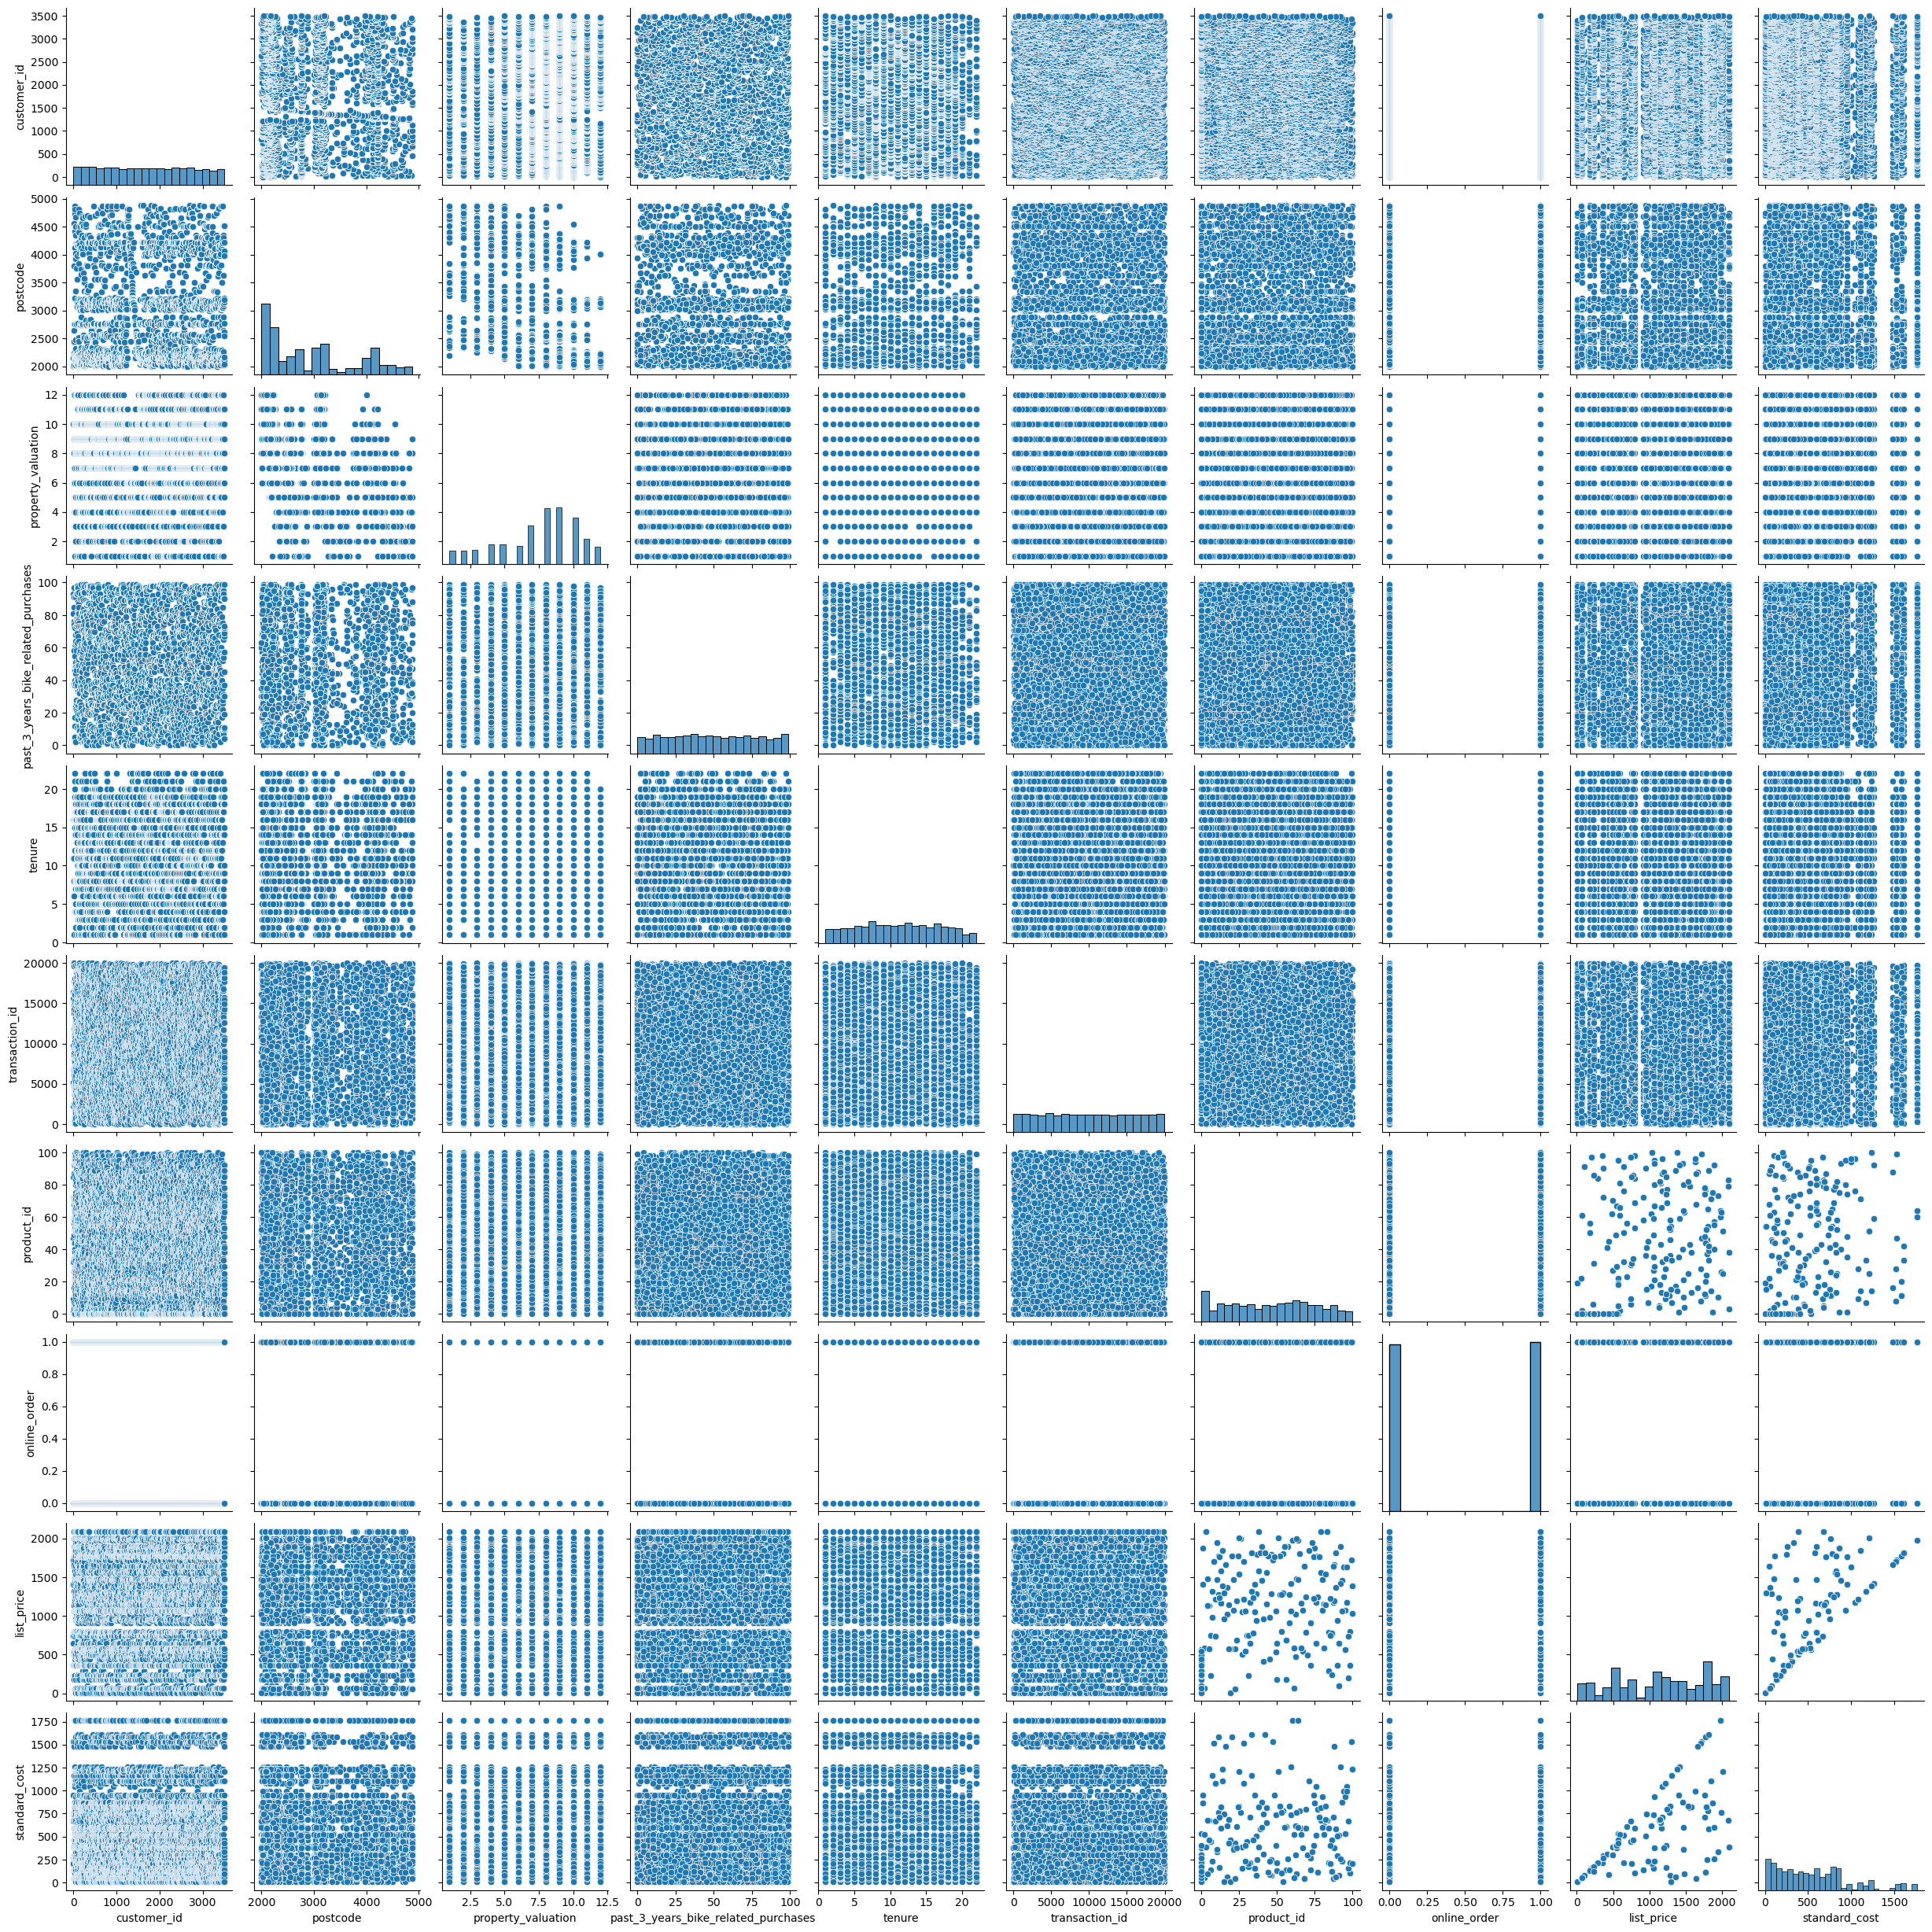

In [73]:
sns.pairplot(data=df, aspect=1)

In [75]:
px.scatter(data_frame=df, x=df['list_price'], y=df['standard_cost'], trendline='ols')

In [101]:
df[['transaction_date', 'list_price']].groupby('transaction_date').agg('mean')

0                  list_price
transaction_date             
2017-01-01        1136.787778
2017-01-02        1231.332000
2017-01-03        1073.744400
2017-01-04        1122.520714
2017-01-05        1171.860769
...                       ...
2017-12-26        1040.414667
2017-12-27        1134.248235
2017-12-28        1226.223889
2017-12-29        1317.518889
2017-12-30        1294.925294

[364 rows x 1 columns]

<Axes: xlabel='transaction_date', ylabel='AVG of list price'>

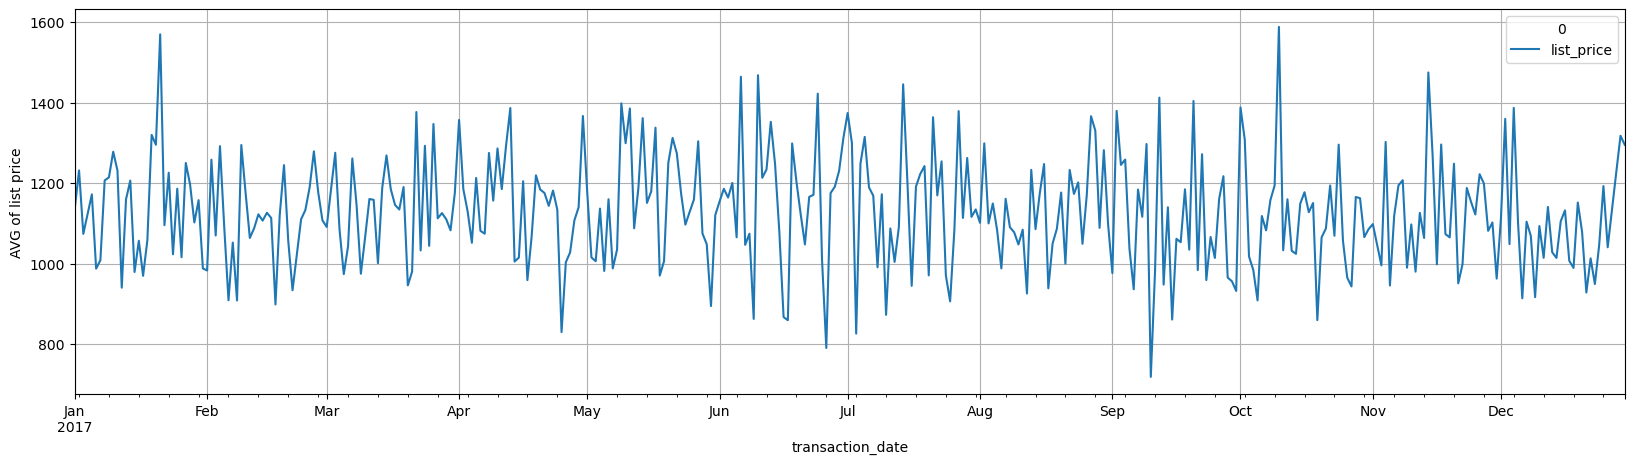

In [102]:
df[['transaction_date', 'list_price']].groupby('transaction_date').agg('mean').plot(kind='line', grid=True, figsize=(20,5),ylabel='AVG of list price')

In [100]:
df[['transaction_date', 'standard_cost']].groupby('transaction_date').agg('mean')

0                 standard_cost
transaction_date               
2017-01-01           482.076667
2017-01-02           349.420667
2017-01-03           666.893200
2017-01-04           469.005000
2017-01-05           505.186154
...                         ...
2017-12-26           517.088667
2017-12-27           640.536471
2017-12-28           519.151667
2017-12-29           752.588333
2017-12-30           729.432941

[364 rows x 1 columns]

<Axes: xlabel='transaction_date', ylabel='AVG of standard cost'>

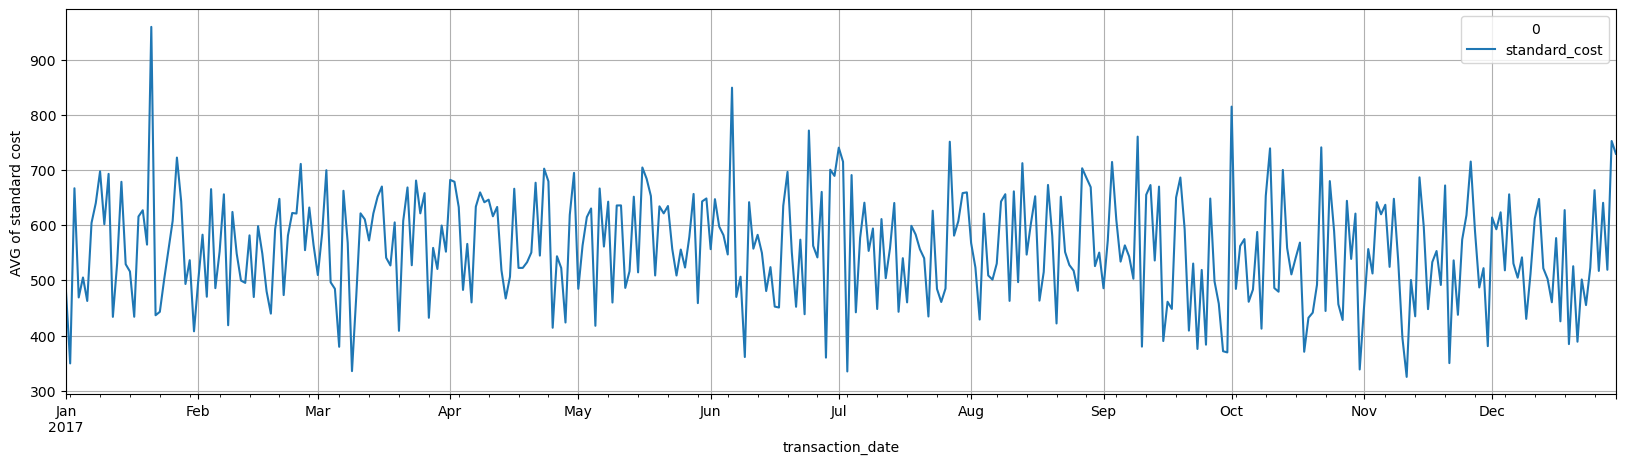

In [103]:
df[['transaction_date', 'standard_cost']].groupby('transaction_date').agg('mean').plot(kind='line', grid=True, figsize=(20,5),ylabel='AVG of standard cost')